In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext rpy2.ipython
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') #Supress unnecessary warnings for readability and cleaner presentation

In [2]:
%R require(treemap)

array([1], dtype=int32)

In [3]:
# Load files
datadir = '/data/Instacart/'

aisles = pd.read_csv(datadir +'aisles.csv')
dept = pd.read_csv(datadir +'departments.csv')
products = pd.read_csv(datadir + 'products.csv')

# combine all above three into one dataframe
product_info = pd.merge(pd.merge(products, dept, on ='department_id', how = 'left'), aisles, on='aisle_id', how = 'left')

In [4]:
grouped = products.groupby(['department_id', 'aisle_id']).product_id.count().reset_index()
grouped = pd.merge(pd.merge(grouped, dept, on ='department_id', how = 'left'), aisles, on='aisle_id', how = 'left')
grouped.head()

,department_id,aisle_id,product_id,department,aisle
0,1,34,229,frozen,frozen meat seafood
1,1,37,1091,frozen,ice cream ice
2,1,38,880,frozen,frozen meals
3,1,42,189,frozen,frozen vegan vegetarian
4,1,52,296,frozen,frozen breakfast


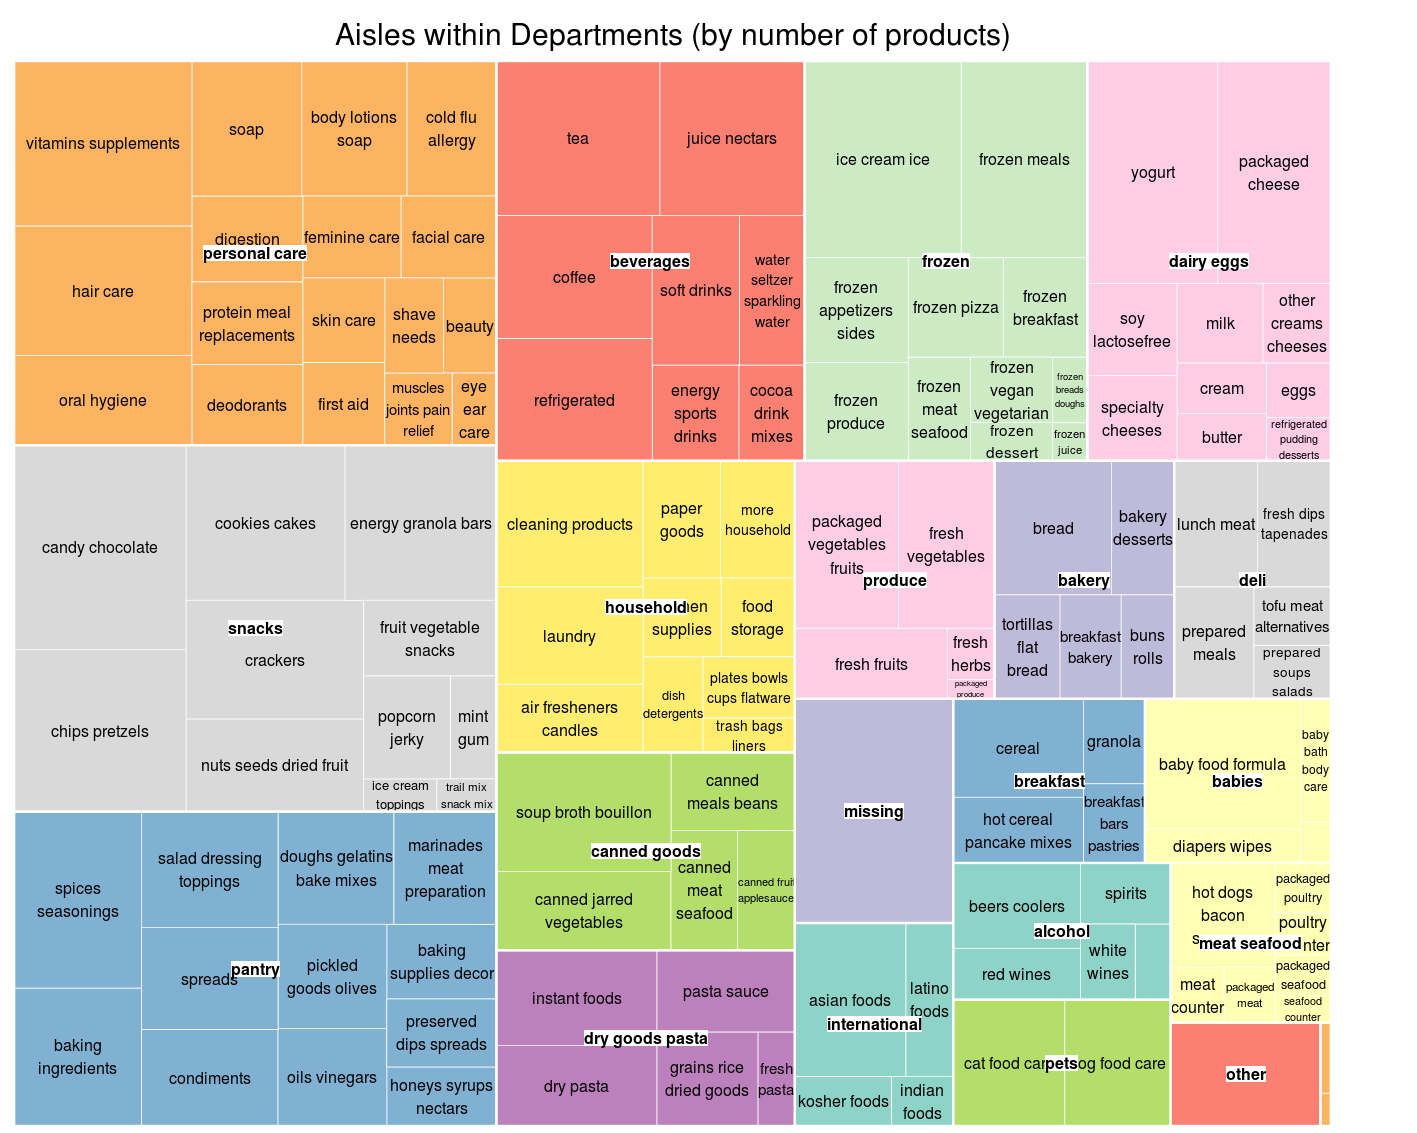

In [5]:
%%R -i grouped -w 50 -h 40 -u cm
treemap(grouped,index=c("department","aisle"),vSize="product_id",vColor="department",palette="Set3",
        border.col="#FFFFFF",type="categorical", fontsize.legend = 0,bg.labels = "#FFFFFF",
        title = " Aisles within Departments (by number of products) ", fontsize.title=30, fontsize.labels= 16 )

In [6]:
# load files
orders = pd.read_csv(datadir + 'orders.csv')
prior = pd.read_csv( datadir + 'order_products__prior.csv')
train = pd.read_csv(datadir + 'order_products__train.csv')

# Merge the user_id with order_products
order_product = pd.merge( pd.concat([prior, train], axis =0), 
                         orders[['order_id','user_id', 'order_number', 'days_since_prior_order']], on = 'order_id', how='inner')

del orders
del prior
del train

# Merge with the department/asile info
order_product = pd.merge(order_product, product_info, on='product_id', how='left')

In [7]:
grouped = order_product.groupby(['department','aisle']).agg({"user_id":'nunique',
                                                             'days_since_prior_order': 'mean','reordered':['count', 'sum'] })
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped.reset_index(inplace = True)
grouped.rename(columns={'user_id_nunique': 'user_count', 'reordered_sum': 'reordered_count',
                                    'reordered_count':'product_count'}, inplace=True)
grouped.head()

,department,aisle,product_count,reordered_count,days_since_prior_order_mean,user_count
0,alcohol,beers coolers,50496,28627,10.764294,8278
1,alcohol,red wines,36424,20034,11.070898,7258
2,alcohol,specialty wines champagnes,11659,5681,10.495179,3898
3,alcohol,spirits,29069,16652,10.131714,5837
4,alcohol,white wines,31646,19998,10.172300,6514


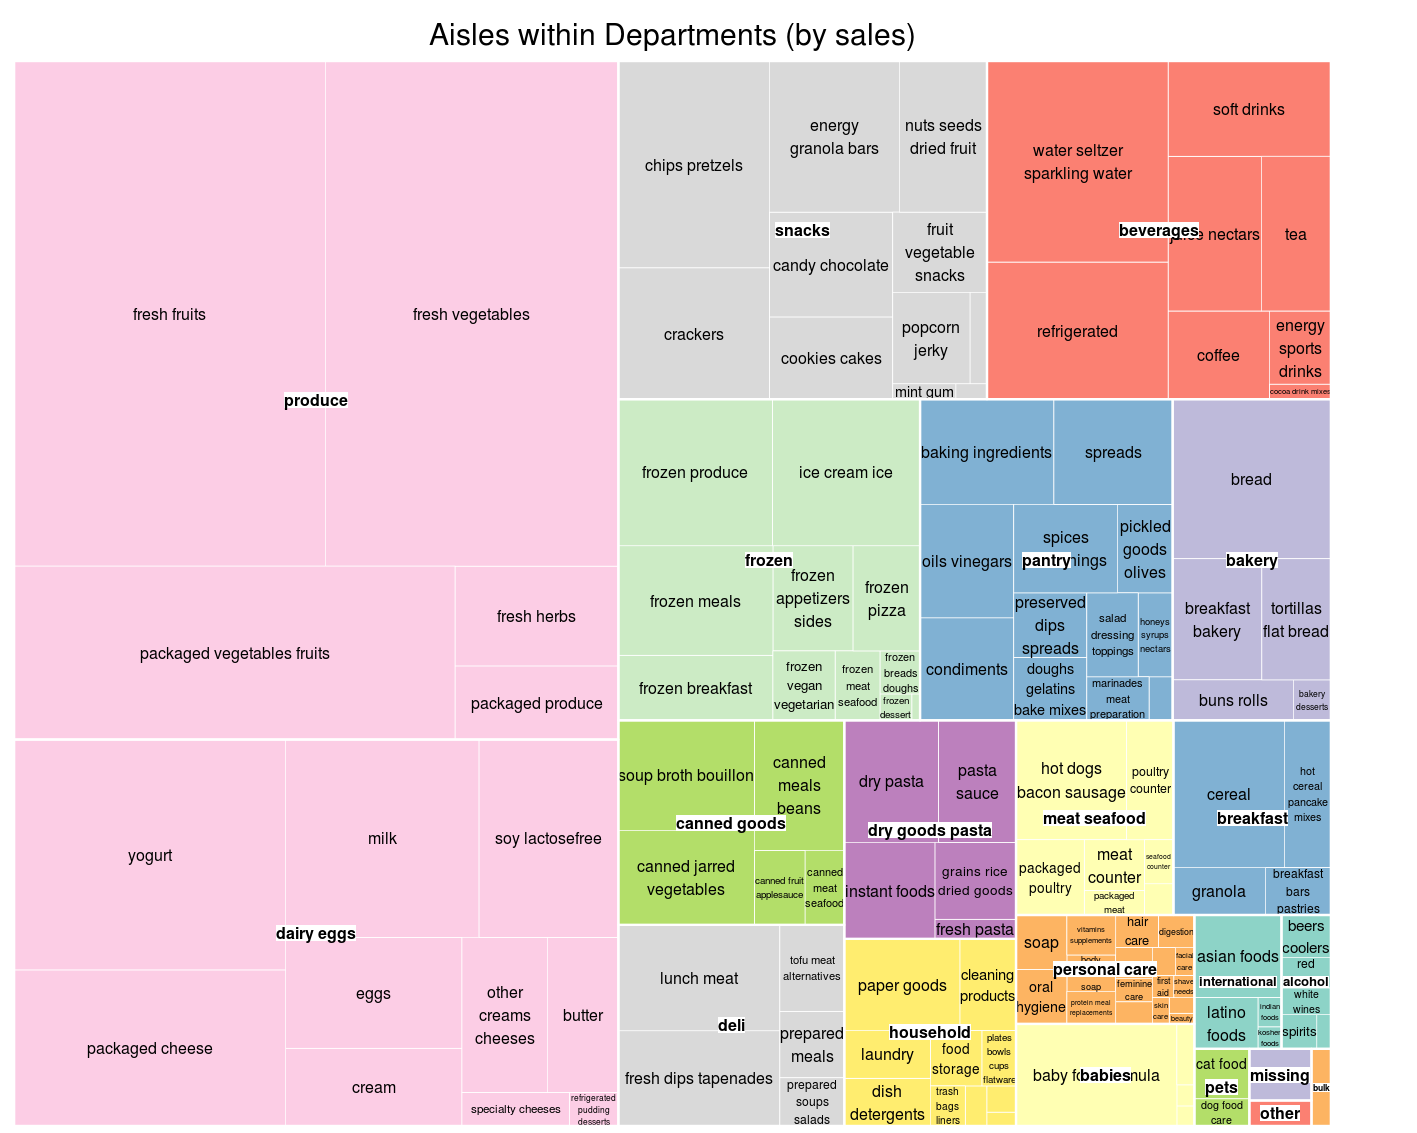

In [8]:
%%R -i grouped -w 50 -h 40 -u cm
treemap(grouped,index=c("department","aisle"),vSize="product_count",vColor="department",palette="Set3",
        border.col="#FFFFFF",type="categorical", fontsize.legend = 0,bg.labels = "#FFFFFF",
        title = " Aisles within Departments (by sales) ", fontsize.title=30, fontsize.labels= 16 )

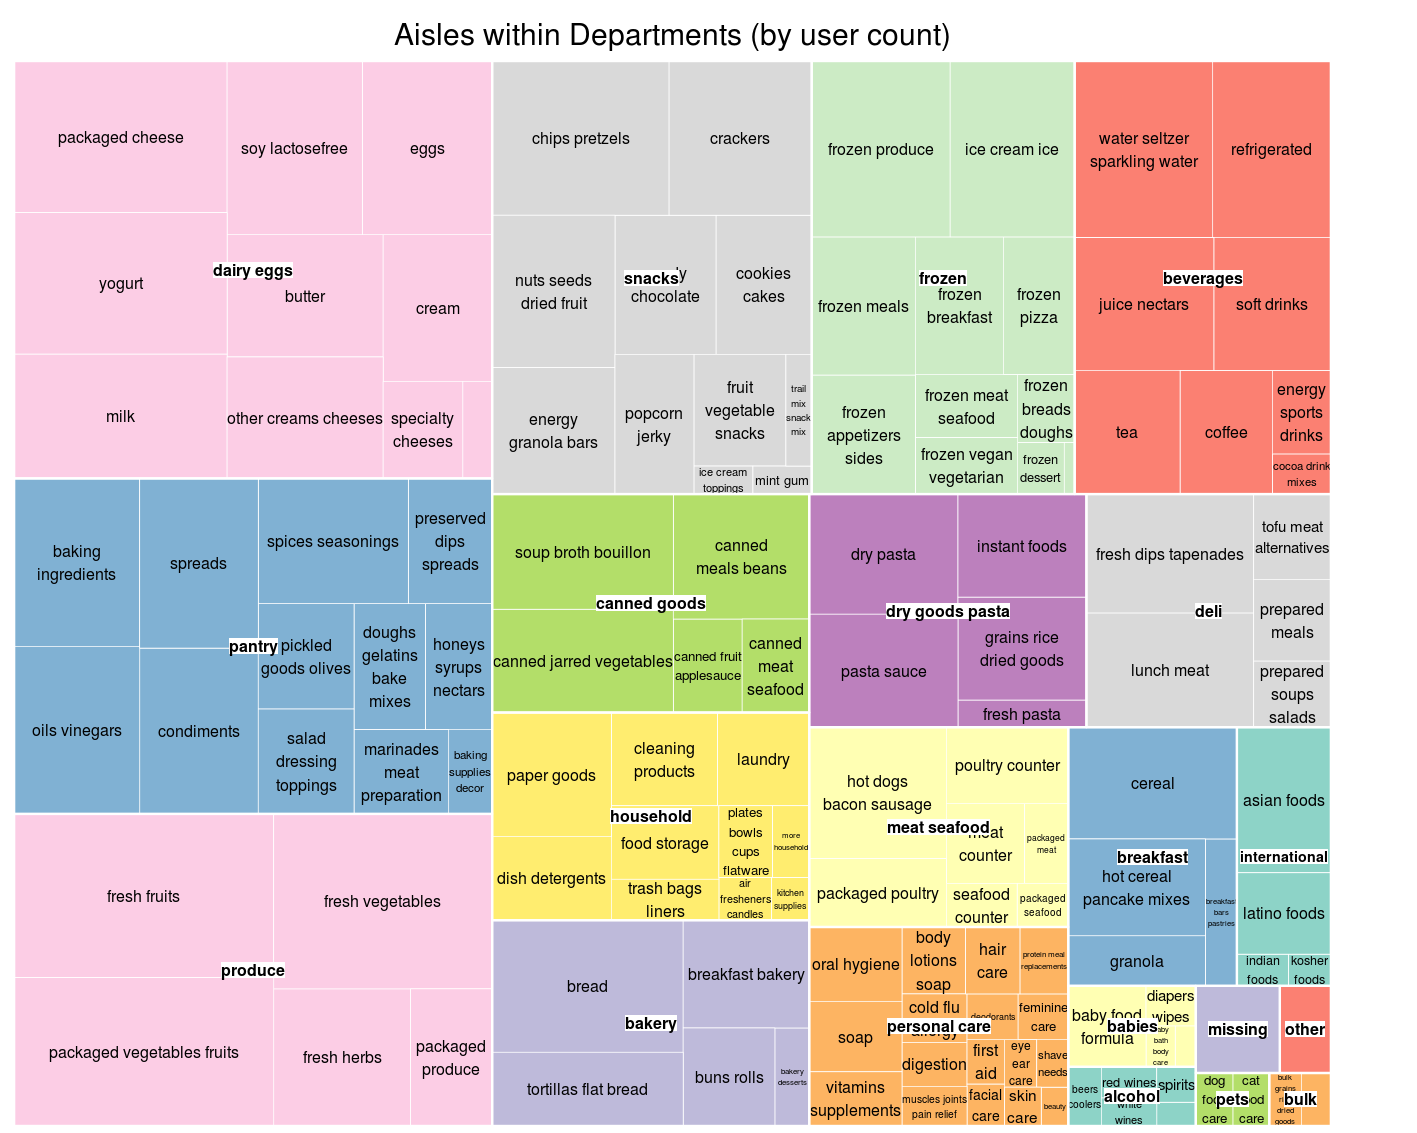

In [9]:
%%R -i grouped -w 50 -h 40 -u cm
treemap(grouped,index=c("department","aisle"),vSize="user_count",vColor="department",palette="Set3",
        border.col="#FFFFFF",type="categorical", fontsize.legend = 0,bg.labels = "#FFFFFF",
        title = " Aisles within Departments (by user count) ", fontsize.title=30, fontsize.labels= 16 )

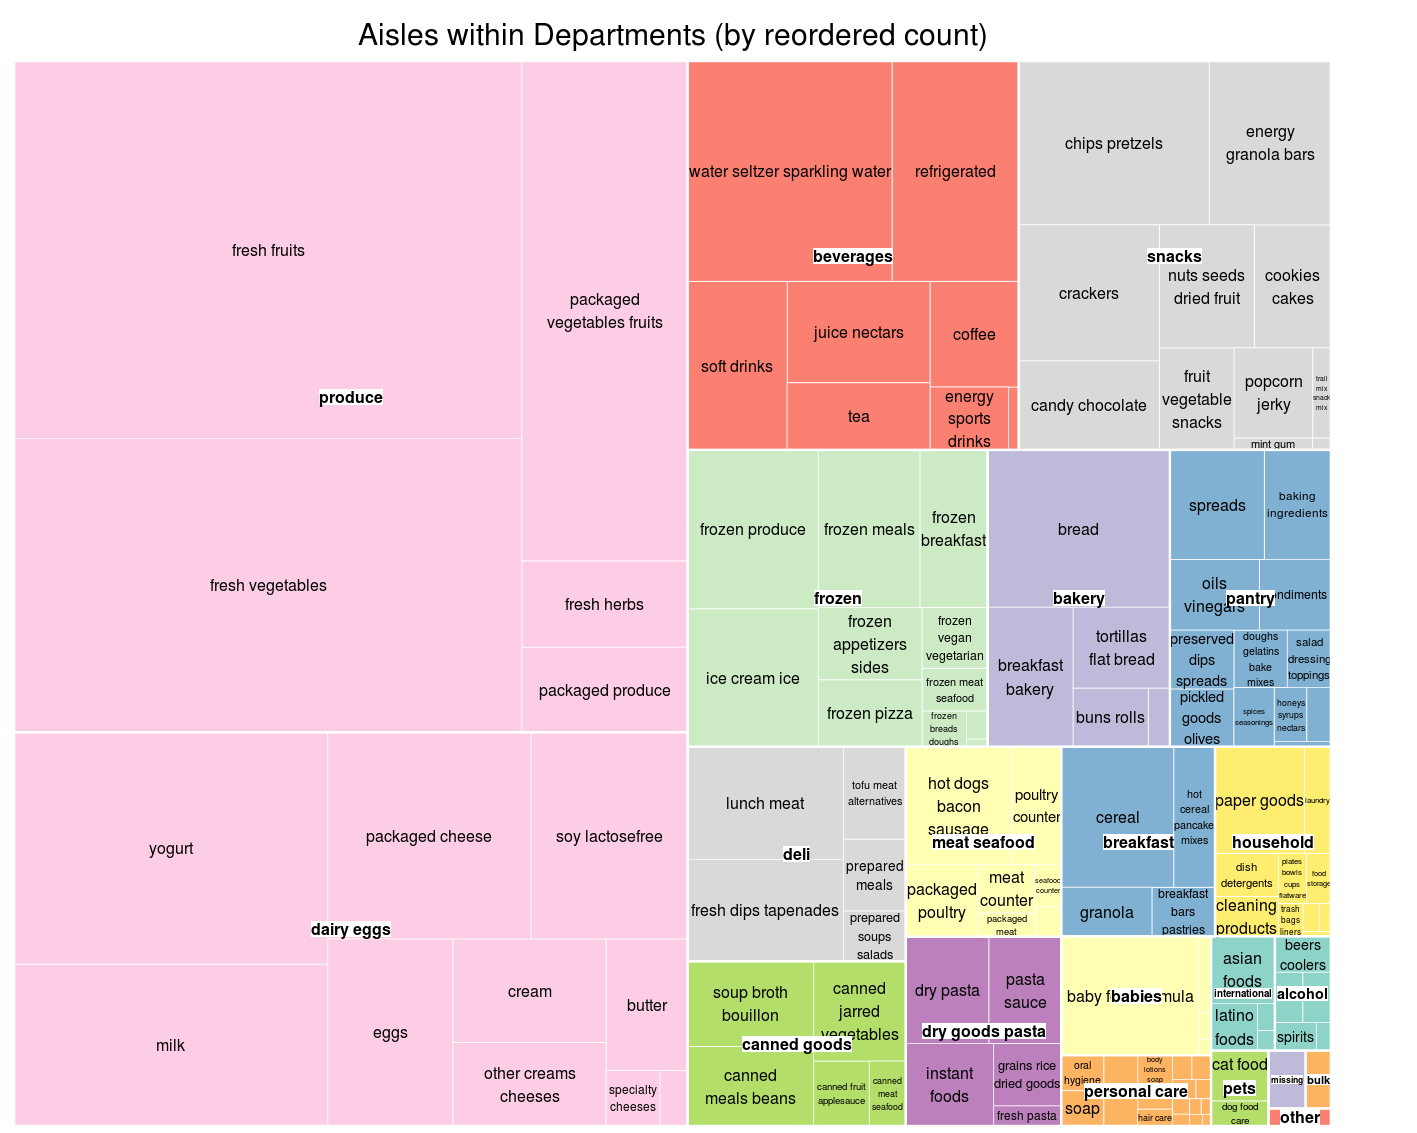

In [10]:
%%R -i grouped -w 50 -h 40 -u cm
treemap(grouped,index=c("department","aisle"),vSize="reordered_count",vColor="department",palette="Set3",
        border.col="#FFFFFF",type="categorical", fontsize.legend = 0,bg.labels = "#FFFFFF",
        title = " Aisles within Departments (by reordered count) ", fontsize.title=30, fontsize.labels= 16 )

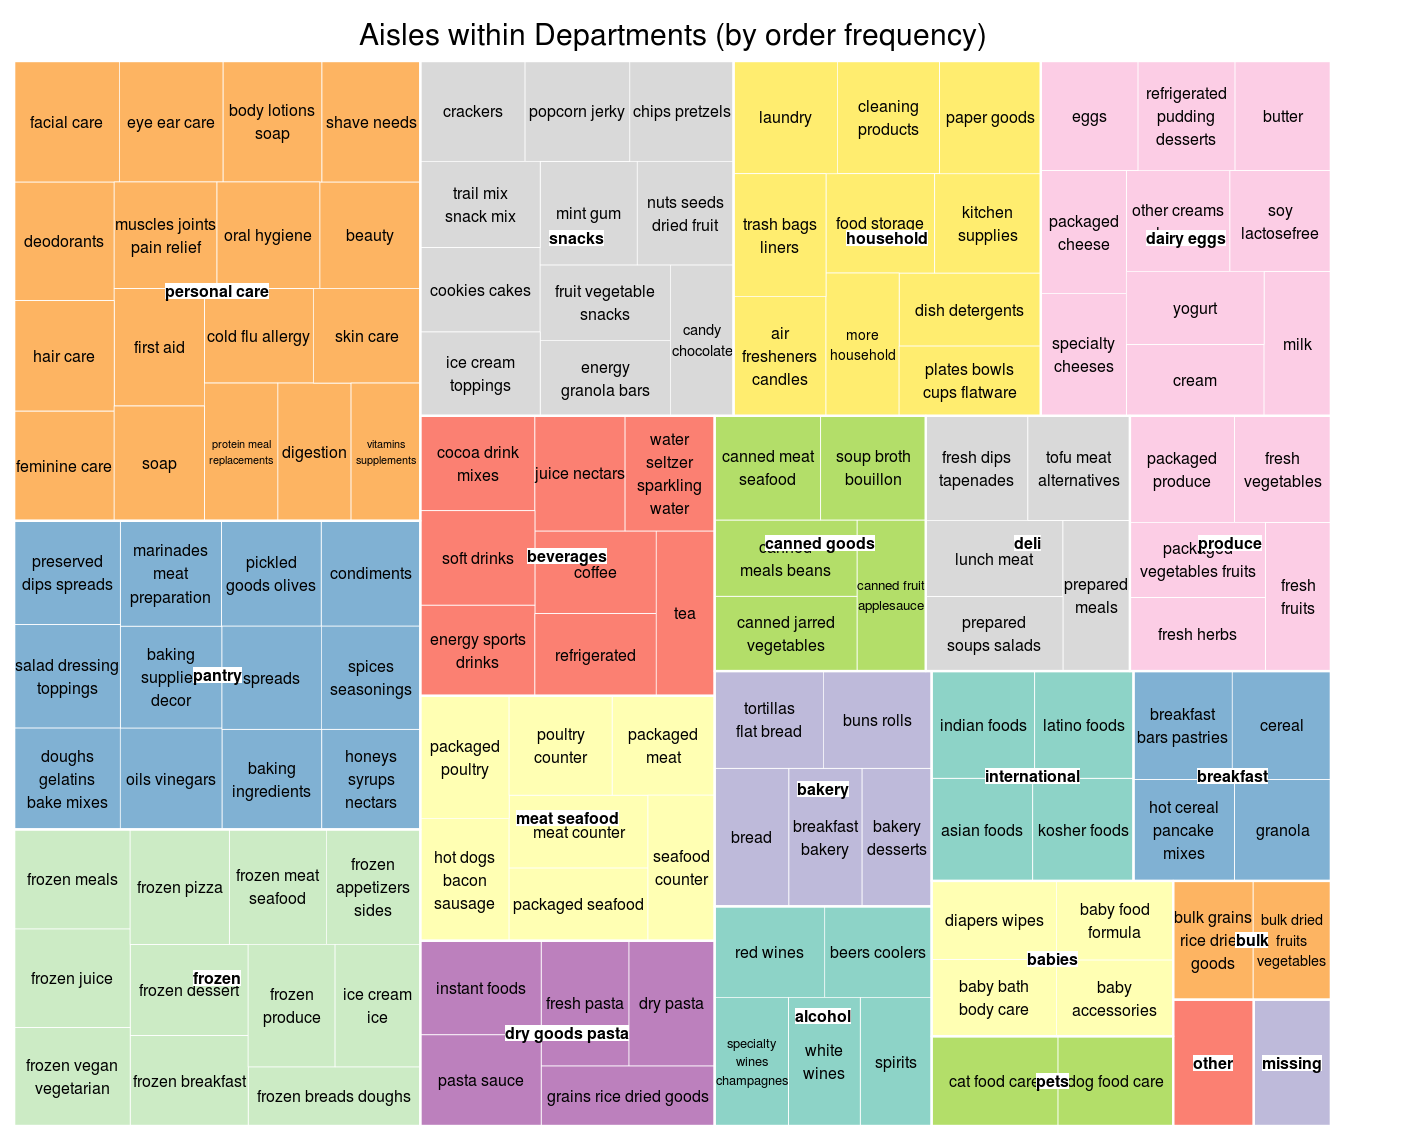

In [11]:
%%R -i grouped -w 50 -h 40 -u cm
treemap(grouped,index=c("department","aisle"),vSize="days_since_prior_order_mean",vColor="department",palette="Set3", 
        border.col="#FFFFFF",type="categorical", fontsize.legend = 0,bg.labels = "#FFFFFF",
        title = " Aisles within Departments (by order frequency) ", fontsize.title=30, fontsize.labels= 16 )